In [11]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [12]:
df = pd.read_excel('./rawdata/metro_data_restart.xlsx')
df

,사용월,호선명,지하철역,행정구역,transfer_line,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202111,우이신설선,4.19민주묘지,강북구,1.0,NaN,NaN,30,2,0,...,2179,0,28,0,0,0,0,0,0,20211203
1,202112,우이신설선,4.19민주묘지,강북구,1.0,NaN,NaN,31,0,1,...,1720,0,0,0,0,0,0,0,0,20220103
2,202201,우이신설선,4.19민주묘지,강북구,1.0,NaN,NaN,31,3,2,...,1309,0,0,0,0,0,0,0,0,20220203
3,202202,우이신설선,4.19민주묘지,강북구,1.0,NaN,NaN,28,0,0,...,1293,0,0,0,0,0,0,0,0,20220303
4,202203,우이신설선,4.19민주묘지,강북구,1.0,NaN,NaN,31,0,0,...,2136,1,40,0,0,0,0,0,0,20220403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13056,202406,9호선,흑석(중앙대입구),동작구,1.0,NaN,NaN,30,4,0,...,7126,1071,2518,0,33,0,1,0,0,20240703
13057,202407,9호선,흑석(중앙대입구),동작구,1.0,NaN,NaN,31,0,0,...,6699,652,2727,0,25,0,0,0,0,20240803
13058,202408,9호선,흑석(중앙대입구),동작구,1.0,NaN,NaN,31,5,0,...,6354,575,2372,0,27,0,0,0,0,20240903
13059,202409,9호선,흑석(중앙대입구),동작구,1.0,NaN,NaN,30,8,0,...,6146,955,2272,7,42,0,2,0,0,20241003


In [13]:

for col in df.columns :
    if '승차인원' in col :
        exit_col = col.replace('승차인원', '하차인원')
        if exit_col in df.columns :
            stay_col = col.replace('승차인원', '체류인원')
            df[stay_col] = df[col] + df[exit_col]

df.head(2)

,사용월,호선명,지하철역,행정구역,transfer_line,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,202111,우이신설선,4.19민주묘지,강북구,1.0,NaN,NaN,30,2,0,...,11217,9453,5773,4917,4159,2485,28,0,0,0
1,202112,우이신설선,4.19민주묘지,강북구,1.0,NaN,NaN,31,0,1,...,10614,8862,5897,5278,3839,1983,0,0,0,0


In [14]:
df.to_excel('./rawdata/metro_data_add_transfer.xlsx', index=False)

In [4]:
# 행정구역별 체류인원 평균

city_avg_stay = df.groupby('행정구역').mean(numeric_only=True).reset_index()

stay_avg = city_avg_stay[['행정구역'] + [col for col in df.columns if '체류인원' in col]]

stay_avg.head(3)

,행정구역,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,강남구,48.714646,4480.890572,21013.780303,52967.909091,112272.991582,93134.095118,52460.399832,43488.975589,45812.904040,...,120645.781987,69454.595118,46361.676768,43114.595118,35110.397306,14689.858586,2656.245791,73.090909,1.120370,0.186869
1,강동구,27.935185,7896.055556,22408.268519,52219.096296,66069.227778,40189.850000,30366.950000,28948.611111,31100.683333,...,64768.659259,45345.718519,29180.488889,26043.537037,22228.962963,11733.542593,3309.468519,137.801852,0.405556,0.000000
2,강북구,26.194444,6687.896465,16020.671717,37929.755051,48569.840909,32952.919192,25652.583333,25312.583333,26487.189394,...,46760.863636,36533.434343,24204.343434,20971.881313,17586.820707,10264.790404,2021.815657,10.595960,0.250000,0.000000


In [6]:
# 행정구역을 인덱스로 설정하고 이름 바꾸기

city_avg = city_avg_stay[['행정구역'] + [col for col in df.columns if '체류인원' in col]].set_index('행정구역')
city_avg.index.name = 'City'

city_avg.head(3)

,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,13시-14시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
City,,,,,,,,,,,,,,,,,,,,,
강남구,48.714646,4480.890572,21013.780303,52967.909091,112272.991582,93134.095118,52460.399832,43488.975589,45812.904040,50364.632155,...,120645.781987,69454.595118,46361.676768,43114.595118,35110.397306,14689.858586,2656.245791,73.090909,1.120370,0.186869
강동구,27.935185,7896.055556,22408.268519,52219.096296,66069.227778,40189.850000,30366.950000,28948.611111,31100.683333,32168.509259,...,64768.659259,45345.718519,29180.488889,26043.537037,22228.962963,11733.542593,3309.468519,137.801852,0.405556,0.000000
강북구,26.194444,6687.896465,16020.671717,37929.755051,48569.840909,32952.919192,25652.583333,25312.583333,26487.189394,26932.760101,...,46760.863636,36533.434343,24204.343434,20971.881313,17586.820707,10264.790404,2021.815657,10.595960,0.250000,0.000000


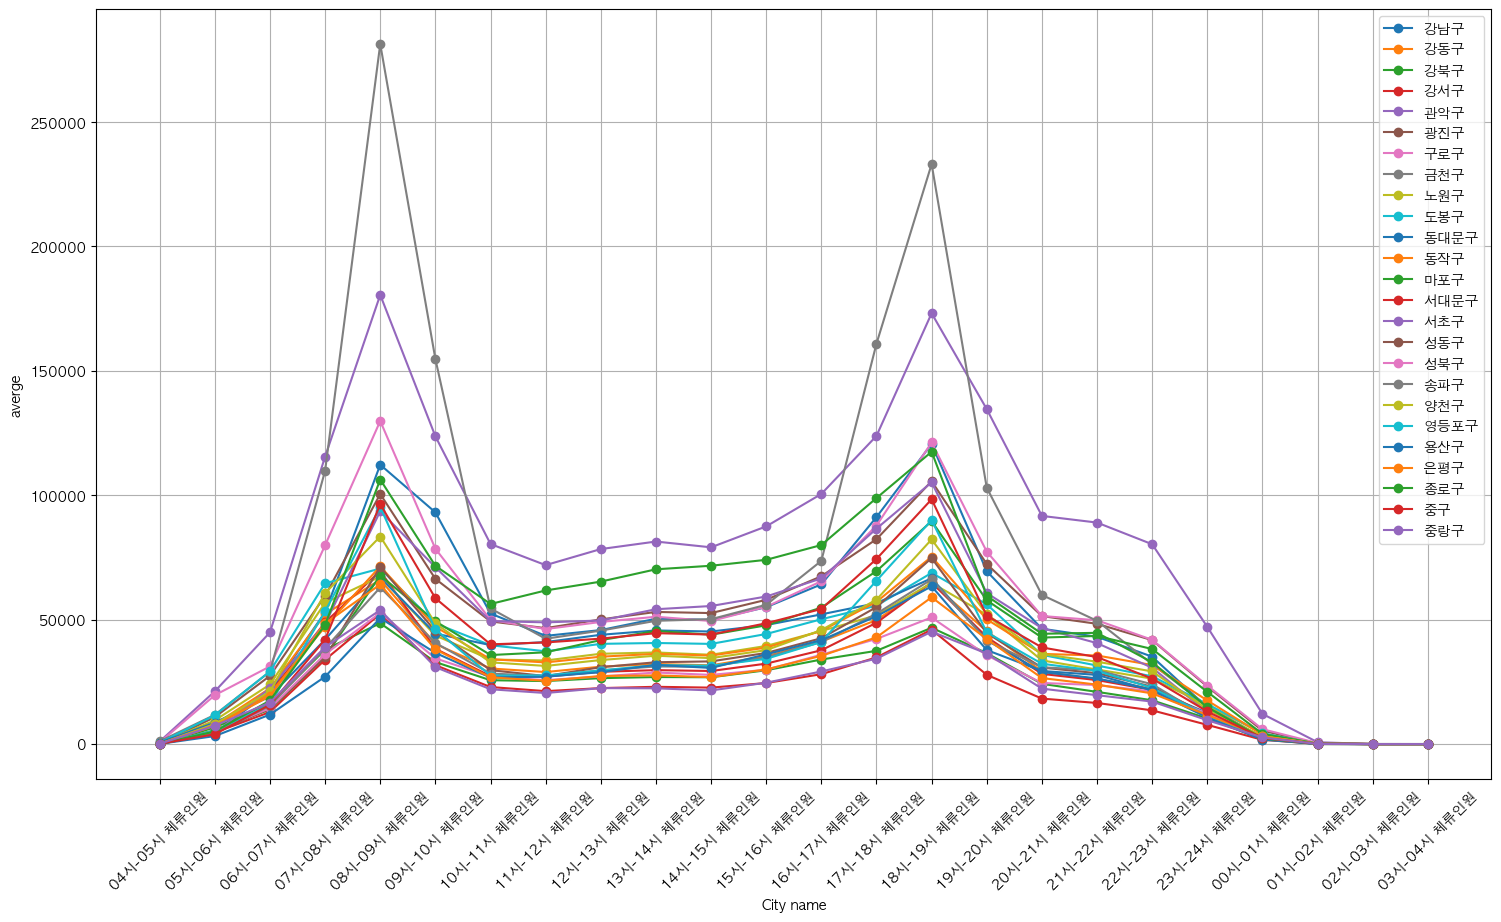

In [7]:
# 행정구역별 체류인원 변화 City graph

plt.figure(figsize=(18,10))

for City in city_avg.index:
    plt.plot([col for col in city_avg.columns if '체류인원' in col], city_avg.loc[City], marker='o', label=str(City))

plt.xlabel('City name')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

In [8]:
# 행정구역별 시간대 평균 중 상위 10% 월만 

top_10 = city_avg[city_avg.max(axis=1) > city_avg.quantile(0.9).max()]
top_10


,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,13시-14시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
City,,,,,,,,,,,,,,,,,,,,,
관악구,1020.545977,21179.879310,44871.982759,115563.747126,180541.988506,123706.873563,80402.160920,71919.637931,78374.965517,81400.408046,...,173158.488506,134623.241379,91700.224138,89022.890805,80311.051724,47095.879310,12114.373563,728.126437,5.902299,1.045977
구로구,648.882716,19641.160494,31200.425926,79907.913580,129850.543210,78518.987654,49903.055556,46218.839506,49079.709877,51162.367284,...,121216.114198,77333.003086,51471.635802,49755.648148,41885.546296,23497.015432,5971.675926,396.929012,3.407407,0.873457
금천구,1084.319444,11745.041667,29096.527778,109860.055556,281378.430556,154785.888889,54511.861111,42329.458333,45599.902778,49544.638889,...,233107.805556,103042.361111,59926.847222,49528.527778,32078.513889,15344.555556,2522.986111,3.569444,0.180556,0.000000


In [9]:
# 행정구역별 시간대 평균 중 하위 10% 월만 

bottom_10 = city_avg[city_avg.max(axis=1) < city_avg.quantile(0.1).max()]
bottom_10


,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,13시-14시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
City,,,,,,,,,,,,,,,,,,,,,
강북구,26.194444,6687.896465,16020.671717,37929.755051,48569.840909,32952.919192,25652.583333,25312.583333,26487.189394,26932.760101,...,46760.863636,36533.434343,24204.343434,20971.881313,17586.820707,10264.790404,2021.815657,10.59596,0.250000,0.00000
서대문구,59.013889,4639.490741,12863.462963,33880.837963,52342.032407,31709.277778,22914.800926,21266.268519,22488.611111,23013.046296,...,45984.625000,27826.504630,18267.791667,16508.662037,13540.013889,7711.587963,1685.935185,102.37500,1.148148,0.24537


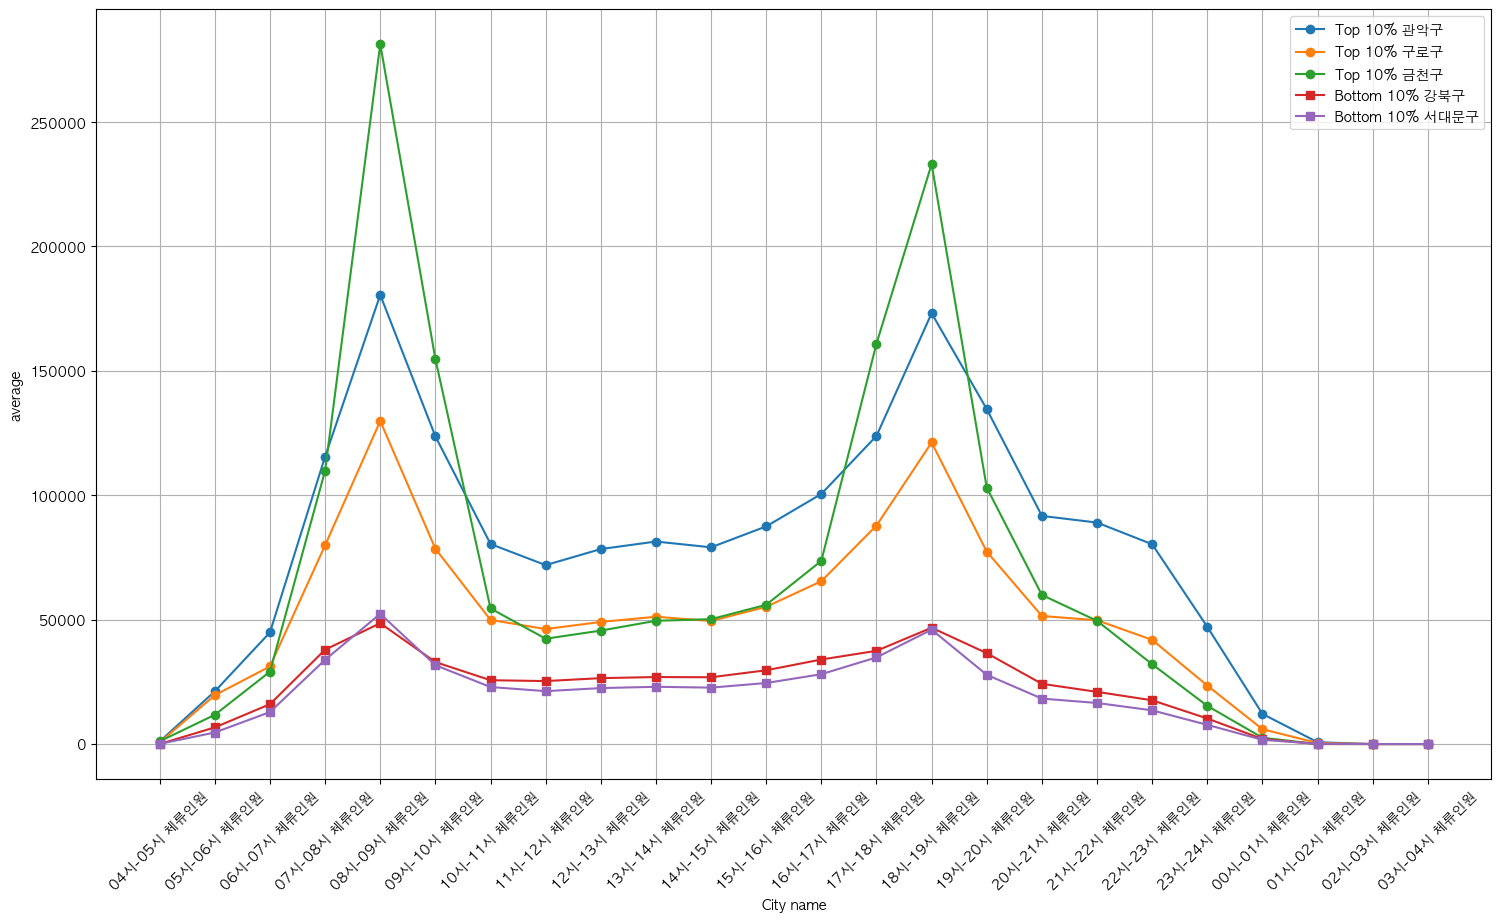

In [10]:
plt.figure(figsize=(18,10))

for City in top_10.index:
    plt.plot([col for col in top_10.columns if '체류인원' in col], 
             top_10.loc[City], marker='o', label=f'Top 10% {City}')

for City in bottom_10.index:
    plt.plot([col for col in bottom_10.columns if '체류인원' in col], 
             bottom_10.loc[City], marker='s', label=f'Bottom 10% {City}')


plt.xlabel('City name')
plt.ylabel('average')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

In [13]:
df.head(1)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,11217,9453,5773,4917,4159,2485,28,0,0,0


- 서울 주요 노선 (1~9호선)의 이용 패턴에 비해 나머지 노선도 (시외에서 들어오는 노선들)의 경우
    주요 노선의 평균 값 정도의 최대값을 보이고 있음
- 수도권 > 서울 로의 이동보다 서울 > 서울 의 이동이 더 많음을 짐작할 수 있음

- 금천구의 유동인구 비율이 높은 것으로 보이며, 관악구의 경우 출퇴근 시간을 제외하고도 많은 유동인구가 있음
    - 관악구의 경우 대학 캠퍼스가 많아 학생들의 유동인구가 많은 것으로 판단
    - 관악구 >> 사회 초년생들이 많이 거주하고 있는 곳이어서 피크타임에 유동인구가 있는 편으로 추정됨
